# Explainer on Hypothesis Testing and Bayesian Posterior Inference

In this notebook we will consider two types of reasoning, hypothesis testing and Bayesian inference. As we will see, both of these types of reasoning are quite common. But, we will be concerned with situtations in which this reasoning can be carried out with precision and objectivity, specifically, circumstances in which we can use the mathematical theories of probability and statistics. Our goal here is simply to understand what the types of reasoning are and how probability and statistics can be used to help us reason well. I will begin by talking about hypothesis testing. After introducing the main idea I will focus on a particular sort of hypothesis test called a t-test and give an example of how to do a t-test. Then I will talk about Bayesian inference. I will go through a couple different techniques for doing Bayesian inference using a similar example as was used to illustrate the t-test. Lastly, we can compare the two sorts of inference to see what the main differences are. 

## Hypothesis Testing

A __hypothesis test__ is a method for determining how likely an observation is given some hypothesis. If we make some observation and it is highly unlikely that we would make that observation given some hypothesis, then we have justification for rejecting that hypothesis. Alternatively, if we make some observation and it is highly likely that we would make that observation given some hypothesis, then this gives some further credence to the hypothesis (the degree of confirmation depends on many different factors I won't go into here). We are going to focus on cases in which an observation is highly unlikely given some hypothesis. 

Consider the following scenario: I arrive home from work and am greeted by my dog. I assume that my dog has been a good dog today per usual. Then I observe that my trash can is tipped over and spilled onto my floor. I judge this observation to be highley unlikely given the hypothesis that my dog has been a good dog today. Consequently, I reject that hypthesis.

This is an example of what we might call a _subjective hypothesis test_, where my method is simply to make a judgment about how likely I think an observation is given some hypothesis.  People use hypothesis testing of this sort regularly. _But,_ one issue with this sort of reasoning is that it is subjective! While I judge that the observation is unlikely given the hypothesis, reasonable people could disagree. I haven't given any basis for my judgment beyond that is how it seems to me. And even if I could give some rationale for my judgement, people often just are not good at making judgments of this sort. So how can we do better?

A _statistical hypothesis test_ is a hypothesis test that utilizes the mathematical theories of statistics and probability to determine how likely the observation is given some hypothesis. By using statistics and probability we can be precise and give an objective basis for our judgment of how likely the observation is.  

Unlike the subjective hypothesis test, we cannot always use a statistical hypothesis test. Some hypotheses aren't apt for statistical hypothesis testing and sometimes we just won't have the information necessary to use a statistical hypothesis test. But, if our hypothesis is is apt and we do have relevant data then we can perform a statistical hypothesis test. 

The topic of statistical hypothesis tests is large, so here we will just focus in on one sort of statistical hypothesis test, namely the t-test. There are a few different types of t-test, we are just going to talk about a two independent sample t-test, but, see the appendix for the other types. 

A __two independent sample t-test__ is a type of hypothesis test that can be used when we want to determine whether there is a difference in the means of some numeric feature for two different groups. We use it to test the hypothesis that there is no difference in means. This is typically called the null hypothesis. We will test the hypothesis by taking a sample from the groups being tested and then do some math to determine how likely it is that we would get this sample if the null hypothesis is true. If it is highly unlikely that we would get this sample given the null hypothesis then we reject it in favor of the alternative hypothesis that there is a difference in means. 

Note: We can perform a t-test if the numeric feature is normally distributed, the groups have similar variance, and we have an appropriate sample size of between 20-30. We can use the t-test for larger sample sizes but in that case there are more appropriate hypothesis tests, e.g. a z-test.  

To perform a two sample t-test we take our samples, and for each we compute the mean $\bar{x}_i$, standard deviation $\sigma_i$, and record the sample size $n_i$. We then use these values to calculate something called the t-statistic. Once we have the t-statistic we will determine how likely it is that we would get a sample with this t-statistic given the null hypothesis. If it is highly unlikely we would get that t-statistic given the null hypothesis then we will reject the null hypothesis. Otherwise we won't do anything.

The t-statistic essentially depends on two factors, how big is the difference in the sample means and how much variance is there in the samples. The bigger the difference in sample means, the more extreme the t-statistic (farther from zero). And the bigger the variance in the samples, the less extreme the t-statistic (closer to zero). It should be clear why a big difference in sample means is relevant, we are trying to determine if there is a difference between the group means. The reason why we take the variance into account is that if there is a lot of variance in the sample we should be less confident that the sample mean is close to the group mean. So even if there is a big difference in sample means, if there is sufficiently large sample variance we should not reject the null hypothesis. 

We calculate the t-statistic using the following equation:

$$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}.$$

Now we want to assess how likely it is that we would get the calculated t-statistic if the null hypothesis is true. The probability that we would observe this t-statistic under the null hypothesis is called the __p-value__. If the p-value is very low, this just mean that it is highly unlikely we would get this t-statistic given the null hypothesis, in which case we will reject the null hypothesis. Typically, a p-value of less than .05 is seen as grounds for rejecting the null hypothesis. But really it all depends on how important it is to be correct. If it is not a vital matter whether the null hypothesis is true, we might raise the threshold for rejecting the null hypothesis to say .1. Alternatively, if it is really important that we only reject the null hypothesis when it really is false, then we might lower the threshold to .01 or even lower. 

To find the p-value we can use the probability density function for the t-statistic. Under the null hypothesis, if we took many samples from the two groups we are interested in, $t$ would have an approximately normal distribution with a mean of zero and a variance of $\frac{d}{d-1}$, where $d$ is the degrees of freedom. This follows from the central limit theorem, which I won't talk about here, but is worth being familiar with. Let's take a look at a t-distribution.

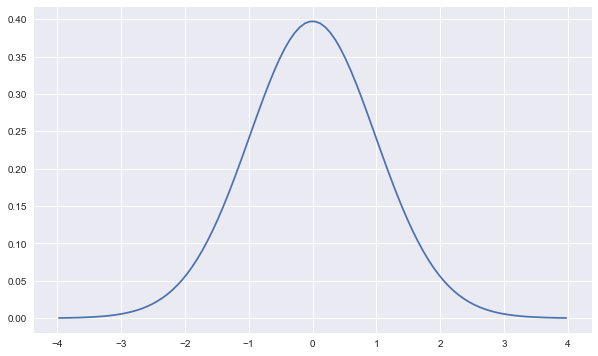

In [22]:
# Plot t-distribution
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import math
%matplotlib inline

plt.style.use('seaborn') 
plt.rcParams['figure.figsize'] = (10, 6)

# t-distribution for two sample test with sample sizes of 30
t_dist = ss.t(df=58)
x = np.linspace(t_dist.ppf(0.0001), t_dist.ppf(0.9999), 100)
s = math.sqrt(t_dist.stats(moments='v'))
plt.plot(x, t_dist.pdf(x))
#plt.vlines([-3*s, -2*s, -s, 0, s, 2*s, 3*s], 0, .4, linestyle='dashed', colors='y')
plt.show()

We can see it does indeed look like a normal distribution centered around zero. To calculate our p-value we will find the value of our t-statistic on the x-axis and then find the area under the curve beyond that point. This is actually the t-distribution we will use for the example of how to do a t-test, so let's turn to that now. 

### Example
Suppose we are planning to move to a new city and we are trying to decide between living in two neighborhoods, Uptown and Downtown. Our budget to buy a home is 200,000 dollars. There are several homes in both neighborhoods that are priced within our budget. But, it would be preferable to find a home within our budget that is in the neighborhood with the higher average of home prices as this leaves more room for our new home's value to grow. So we want to find out if Uptown and Downtown have different averages of home prices.  

To check if there is a difference between the average of home prices for each neighborhood we can perform a t-test. Our null hypothesis is $H_0$: The averages of home prices for each neighborhood are the same. Our alternative hypothesis is $H_1$: The averages of home prices for each neighborhood are different.

We will take a random sample of 30 home values from each neighborhood and perform a t-test on them. If we get p-value less that .05 then we will reject the null hypothesis and conclude the alternative hypothesis is true. First let's get those samples and take a look at them.

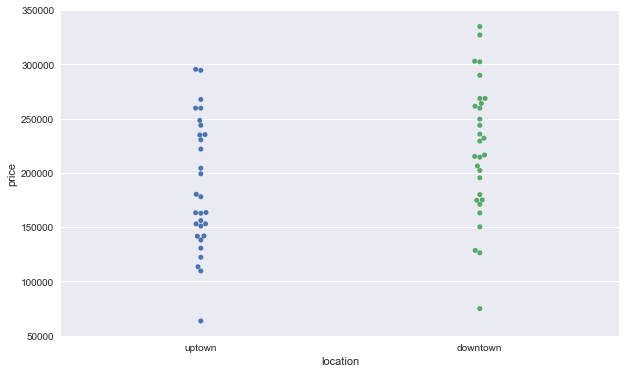

In [86]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.style.use('seaborn') 
plt.rcParams['figure.figsize'] = (10, 6)

np.random.seed(seed=123)

# Draw Samples
uptown_sample = np.random.normal(loc=185000.0, scale=50000.0, size=30)
downtown_sample = np.random.normal(loc=215000.0, scale=50000.0, size=30)

# Create Data Frame
d_1 = {'location':['uptown']*30, 'price':uptown_sample}
d_2 = {'location':['downtown']*30, 'price':downtown_sample}
df = pd.concat([pd.DataFrame(data=d_1), pd.DataFrame(data=d_2)], axis=0) 

# Plot Samples
sns.swarmplot(y='price', x='location', data=df)
plt.show()

Using the good ol' eye test it looks like the average prices for downtown homes is a bit higher than that of uptown homes. But, I think most would agree that the eye test is inconclusive here and so it really is necessary to do the t-test. To do this we need to calculate the t-statistic and then we can see where it is on the t-distribution. 

t-statistic: -2.2680985847258204


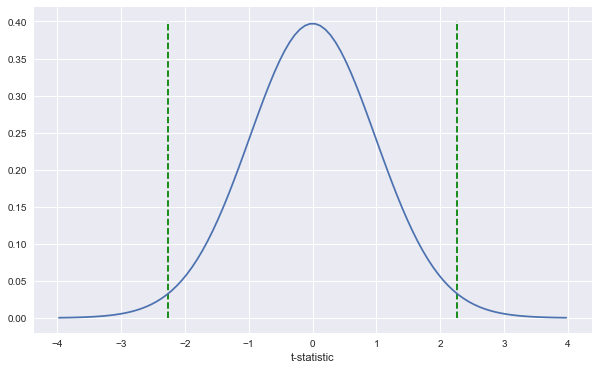

In [136]:
#Perform t-test
uptown_sample_mean = uptown_sample.mean()
uptown_sample_stdev = uptown_sample.std()
uptown_n = 30

downtown_sample_mean = downtown_sample.mean()
downtown_sample_stdev = downtown_sample.std()
downtown_n = 30

t = (uptown_sample_mean - downtown_sample_mean)/math.sqrt((uptown_sample_stdev**2/uptown_n) + (downtown_sample_stdev**2/downtown_n))
print("t-statistic:",t)

# t-distribution for two sample test with sample sizes of 30
t_dist = ss.t(df=58)
x = np.linspace(t_dist.ppf(0.0001), t_dist.ppf(0.9999), 100)
s = math.sqrt(t_dist.stats(moments='v'))
plt.plot(x, t_dist.pdf(x))
plt.vlines([t, -t], 0, .4, linestyle='dashed', colors='g')
plt.xlabel('t-statistic')
plt.show()

To get the p-value we need to find the area under the curve beyond our lines. Since it can be a bit of hassle to do this ourselves, there are tables we could refer to that will give us an approximate p-value for our t-statistic. Alternatively, we can just use a python package to calculate the p-value for us. The scipy.stats package has function for doing a t-test on two samples. 

In [132]:
#Perform t-test using built-in function
display(ss.ttest_ind(uptown_sample, downtown_sample))

Ttest_indResult(statistic=-2.229976565729057, pvalue=0.02963400230870837)

We can see from the t-test that our p-value is approximately .03 which is less than .05! This means that if the null hypothesis is true there is less than a 5% chance that would have gotten the t-statistic we did get. So, we are justified in rejecting the null hypothesis and concluding that there is a difference in the averages of home prices between Uptown and Downtown. But, it is worth noting that if our threshold for a significant p-value had been set lower at .01 then we would not reject the null hypothesis.

Before moving on to talk about Bayesian inference it is worth considering in a bit more depth what the p-value for our t-statistic means. The p-value for a t-statistic represents the _frequency_ at which we would get that t-statistic or one more extereme if the null hypothesis is true. If we performed 100 different t-tests and got this t-statistic or one more extreme each time we would expect the null hypothesis to be true in three of those cases. If we reject the null hypothesis for all of those tests we would be wrong approximately three times.

Let's now suppose that we do 200 hypothesis tests with a threshold of .05 for rejecting the null hypothesis. Assume that 50% of the time the null hypothesis is true and the other 50% of the time the null hypothesis is false. In the cases where the null hypothesis is true, we should expect to get the answer right 95 times and the answer wrong 5 times. What about the cases in which the null hypothesis is false? In this case we need to calculate the __power__ of our test, which is just the proability that we reject the null hypothesis given that it is false. I will omit the details of how to calculate it, but the power of our test will depend on the sample size and the size of the difference we want to detect. We can use a python package to calculate the power of our t-test. 

In [129]:
from statsmodels.stats.power import TTestIndPower

mu_uptown = 185000
mu_downtown = 215000
sigma = 50000
effect_size = (mu_downtown - mu_uptown)/sigma
sample_size = 30
alpha = 0.05

calculator = TTestIndPower()
power = calculator.solve_power(effect_size = effect_size, power=None, nobs1=sample_size, ratio=1.0, alpha=alpha)
print(power)

0.6275045838580626


So we have a power of roughly .63. This means that if the null hypothesis is false there is a 63% chance we will reject it (where 63% chance means that around 63 out of 100 times we will get a t-statistic that will lead us to reject the null hypothesis). Let's put this information together in table: 

|Confusion Matrix|$H_0$ Rejected|$H_0$ Not Rejected|
|----------------|----|--------|
|$H_0$ is False|63|37|
|$H_0$ is True|5|95|

We can use this table along with the concepts of precision and recall to evaluate our test. __Precision__ is defined as the number of true positives divided by the total number of predicted positives. In our case a true positive is the case where we reject the null hypothesis and the null hypothesis is indeed false. The predicted positives are all the cases in which we reject the null hypothesis. So our precision would be .92. We want our test to have high precision and ours seems to have reasonably high precision. __Recall__ is defined as the number of true positives divided by the number of positives. We have 63 true positives. The total number of positives is the number of cases in which the null hypothesis is false, which is 100. So our recall is .63 (which is the same as the power). While our precision is reasonably high our recall would ideally be higher. In our example we know there was a difference in means by design and so we did the correct thing when we rejected the null hypothesis. But, if we had picked a different random sample there is a substantial chance that we would not have rejected the null hypothesis. So our test was not as well designed as it could be. One way we could address the low recall/power would be to increase our sample size. 

## Bayesian Inference

We saw before that statistical hypothesis testing is essentially a way of updating beliefs about some hypothesis in light of some observation made. Bayesian inference can similarly be viewed as a way of updating beliefs given some observation made. The difference is we won't be rejecting a hypothesis but rather will be adjusting how confident we are that the hypothesis is true. So consider again the example where I arrive home from work and am greeted by my dog. Before I make any observation I am fairly confident that my dog has been a good dog today, call that level of confidence $P(H)$. Also, I know in that moment that if I were to see that my trash can is tipped over and spilled onto my floor then I will be much less confident that my dog was a good dog today, call that level of confidence $P(H|O)$. Subsequently, I see that my trash can is tipped over and spilled onto my floor. How confident should I be that my dog was a good dog today, call this unknown level of confidence $P_O(H)$. Well I already knew ahead of time that if I made this observation I would be less confident in this hypothesis, specifically to degree $P(H|O)$. Bayesian inference is just the practice of setting my confidence in the hypothesis after I make the observation to what I had established earlier it would be if I were to make that observation. That is $P_O(H) = P(H|O)$.

Now one worry we should have about this example, a worry we raised before when talking about hypothesis tests, is that my reasoning is too subjective. Specifically, where did $P(H|O)$ come from? Well it was just a vague judgment I made. Fortunately sometimes we are in a position to do better, namely when we can make Bayesian inference precise using the mathematical theory of probability. If we can get some more objective probabilities and use them to determine $P(H|O)$ then our inference will be better. When we are dealing with probabilites, $P_O()$ is called the __posterior probability distribution__ and $P()$ is called the __prior probability distribution__. So another way to describe Bayesian inference is that it is just a way of getting the posterior distribution from the prior distribution, namely we set $P_O() = P(\cdot |O)$ (which is why you will often see the $P(\cdot |O)$ referred to as the posterior distribution).

__Calculating $P(H|O)$:__ To calculate $P(H|O)$ we use what's called "Bayes' Theorem" or "Bayes' Rule":

<br>
$$P(H|O) = \frac{P(O|H)P(H)}{P(O)}.$$ 
<br>
I'll skip over where this comes from, but see the appendix for the motivation for it. The important thing to note is that we can calculate $P(H|O)$ if we can calculate $P(O|H)$, $P(H)$, and $P(O)$. It is often feasible to calculate $P(O|H)$ (we essentially did this when doing a hypothesis test) and $P(H)$ is the prior for our hypothesis which we will supply. Unfortunatley, calculating $P(O)$ is often problematic. We'll see a couple ways of getting around this difficultity but it is best to just see them in action. So let's now turn to an example of Bayesian inference.
    
### Example 
Suppose again that we are interested in home prices for a partiuclar area. Specifically I am interested in the average of home prices in Uptown. Suppose my credences for what the average of home prices in Uptown is are normally distributed with mean 200,000 with a standard deviation of 50,000. That is, I am most confident that the average of home prices in Uptown is 200,000 dollars. As you increase or decrease the value my confidence that this value is the average of home prices in Uptown decreases. Let's visualize the distribution. 

C:\Users\jpkel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


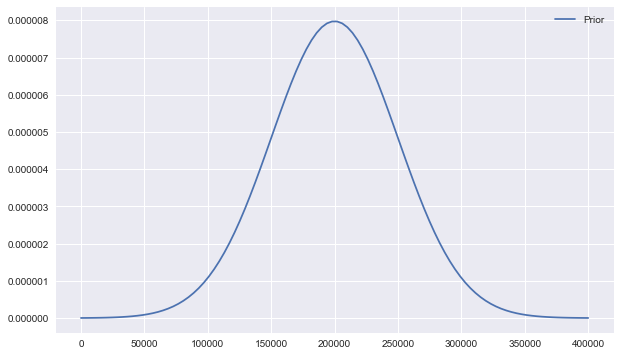

In [125]:
x = np.linspace(200000.0 - 4*50000.0, 200000 + 4*50000.0, 100)
plt.plot(x,mlab.normpdf(x, 200000.0, 50000.0), label='Prior')
plt.legend()
plt.show()

So, I already have some rough idea of what I think the average of home prices in Uptown is. But, this is more or less an educated guess. I would have a better idea if I took a sample and used that to inform my beliefs. Suppose I get a sample of home prices in uptown $X = x_1, ..., x_{30}$, and let $\theta$ be a variable that ranges over the candidate means of home prices in Uptown. Using Bayesian inference and Bayes' rule the posterior distribution is 

$$P_X(\theta) = P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)}.$$

Unfortunately, calculating what we need to in order to specify the posterior distribution is difficult. In particular, it is often infeasible to calculate $P(X)$, which is just the prior probability of getting the data we got. But, there are a couple ways around this. One is posterior sampling which we can use to approximate the posterior and the other is to use the fact that in our case the prior is conjugate to the posterior relative to the likelihood, which basically means we can look up an equation to get the parameters for the posterior which only uses values we already know. I'll go through both now.

We can sample the posterior distribution in order to get an approximate sense of what it is like. You may wonder how we can sample from a distribution for which we are trying to figure out what it is! Yet, there are techniques we can use to get our sample. I'll largely gloss over the technical details, but the basic idea is that the sampling process will propose values for $\theta$ in such a way that the values for $\theta$ that fit better with our observation $X$ and prior will be chosen more often, the values for $\theta$ that do not fit well with our observation $X$ and prior will be chosen less often, and values that are inconsistent with our observation $X$ and prior will be rejected. 

What values of $\theta$ fit better with our observation and prior? Well, the difficulty in calculating $P(\theta|X)$ using Bayes' rule was that we could not calculate $P(X)$, but it is just a fixed number. So, while we cannot calculate the posterior, we can note that for two specific values of $\theta$, $\theta_1$ and $\theta_2$, $P(\theta_1|X) > P(\theta_2|X)$ if and only if $P(X|\theta_1)P(\theta_1) > P(X|\theta_2)P(\theta_2)$. So we can use $P(X|\theta)P(\theta)$ as a way of evaluating how well a particular value of theta fits with our obsevration and prior. 

Now that we have covered the basic idea of posterior sampling, the question remains how do we generate the samples. In this case we will use something called Markov Chain Monte Carlo sampling, specifically what is called the Metropolis–Hastings algorithm. See the appendix for the details on the algorithm.

In [118]:
import scipy.stats as ss

theta_sample = []
sampling_width = 50000.0

#Step One
theta_start = np.random.normal(loc=200000.0, scale=50000.0, size=1)
theta_current = theta_start

for i in range(10000):
    #Step Two  
    theta_new = np.random.normal(loc=theta_current, scale=25000.0, size=1)
    theta_new = theta_new[0]
    
    #Step Three
    likelihood_current = ss.norm(theta_current, 50000.0).pdf(uptown_sample).prod()
    likelihood_new = ss.norm(theta_new, 50000.0).pdf(uptown_sample).prod()
        
    prior_current = ss.norm(200000.0, 50000.0).pdf(theta_current)
    prior_new = ss.norm(200000.0, 50000.0).pdf(theta_new) 
    
    r = (likelihood_new * prior_new) / (likelihood_current * prior_current)

    #Step Four
    t = np.random.rand()
    
    #Step Five
    if t <= r:
        theta_current = theta_new
        theta_sample.append(theta_current)
        
#Drop first half of samples        
theta_sample = theta_sample[-5000:]
theta_sample = np.array(theta_sample)

Now that we have our sample from the posterior we can visulaize it to get a sense of what it looks like. First let's take a look at the distribution of values for $\theta$ we got, which is the theoretical mean for home prices in Uptown.

(array([  2.,  10.,  12.,  32.,  62.,  84., 144., 199., 275., 329., 352.,
        371., 386., 381., 363., 279., 222., 144., 105.,  56.,  25.,  21.,
          5.,   4.,   3.]),
 array([156325.4770919 , 158918.54884208, 161511.62059226, 164104.69234243,
        166697.76409261, 169290.83584279, 171883.90759296, 174476.97934314,
        177070.05109332, 179663.12284349, 182256.19459367, 184849.26634384,
        187442.33809402, 190035.4098442 , 192628.48159437, 195221.55334455,
        197814.62509473, 200407.6968449 , 203000.76859508, 205593.84034526,
        208186.91209543, 210779.98384561, 213373.05559579, 215966.12734596,
        218559.19909614, 221152.27084631]),
 <a list of 25 Patch objects>)

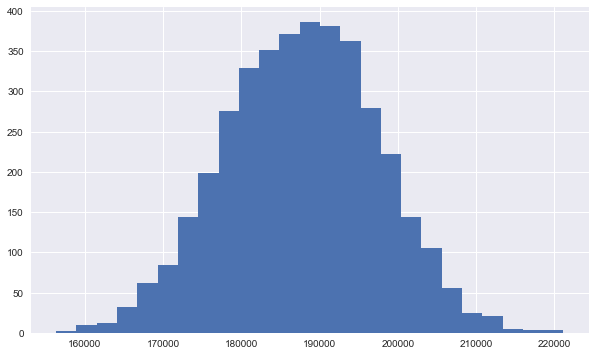

In [126]:
plt.hist(theta_sample, bins=25)

The sample appears normally distributed centered just below 190,000. Next let's look at the probability density function for values of $\theta$, i.e. our approximation of the posterior. We know the posterior is normal so we take the mean of the sample and the standard deviation of our sample and use that to approximate the posterior. Here we will visualize the approximated posterior along with the prior and we will indicate what the mean of observations of home prices in Uptown is.

C:\Users\jpkel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\jpkel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


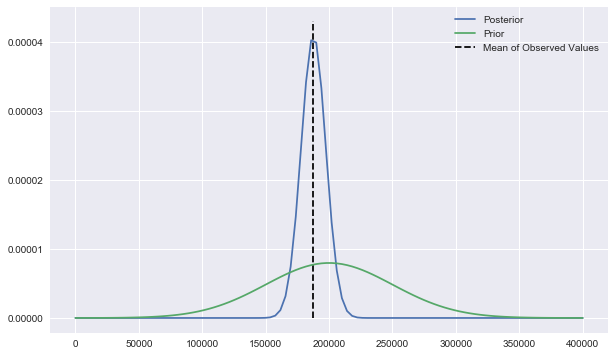

In [127]:
x = np.linspace(200000.0 - 4*50000.0, 200000 + 4*50000.0, 100)

mean = theta_sample.mean()
std = theta_sample.std()
observation = uptown_sample.mean()
plt.plot(x, mlab.normpdf(x, mean, std), label='Posterior')
plt.plot(x,mlab.normpdf(x, 200000.0, 50000.0), label='Prior')
plt.vlines([observation], 0, .000043, linestyle='dashed', colors='k', label='Mean of Observed Values')
plt.legend()

We can see that the posterior is normal and centered right around the mean of our sample of Uptown home prices. So the sample of Uptown home prices is having a large impact on what the posterior distribution is. Given that the true mean of home prices in Uptown in 185,000 dollars and our prior for the mean of home prices in Uptown was centered around 200,000 dollars this seems like a significant improvement. And it is especially good because $P(X|\theta)$ is an objective probability. Even though our prior was arguably subjective, our posterior is much less subjective.

Is this a good approxiamtion of the posterior? There are various ways of evaluating whether we got a good approximation or not I won't go into here. Since we can calculate our posterior from the conjugate prior we can compare the two to evaluate how good our approxiamtion is. Let's turn to calculating the posterior from the conjugate prior.

The second way around calculating the posterior using Bayes' rule is to rely on the fact that in this particular problem we have a prior that is normal and a likelihood, i.e. $P(X|\theta)$, that is normal. Given this situation it can be proved that the posterior distribution will be a normal distribution with the following mean and standard deviation: $$\mu_{\text{posterior}} = \frac{\sigma_{\text{sample}}^2\cdot\mu_{\text{prior}} + n\cdot\sigma_{\text{prior}}^2\cdot\mu_{\text{sample}}}{\sigma_{\text{sample}}^2 + n\cdot\sigma_{\text{prior}}^2},$$

$$\sigma_{\text{posterior}} = \sqrt{\frac{\sigma_{\text{sample}}^2\cdot\sigma_{\text{prior}}^2}{\sigma_{\text{sample}}^2 + n\cdot\sigma_{\text{prior}}^2}}.$$

<br>
The proof is not something worth going through here. Just note that there are other conjugate distributions so it is worth being familiar with what they are if you are doing Bayesian inference often. Let's calculate the posterior and compare it to our approximation.

C:\Users\jpkel\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jpkel\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  app.launch_new_instance()


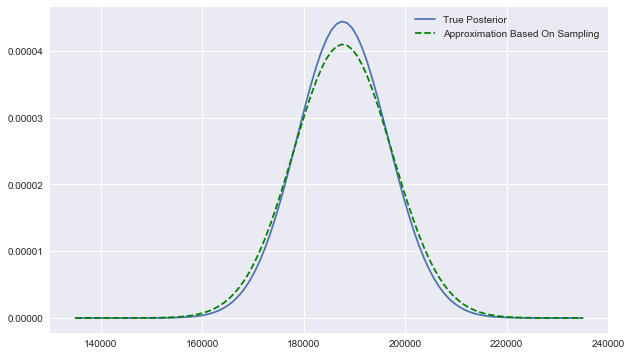

In [124]:
x = np.linspace(185000.0 - 50000.0, 185000.0 + 50000.0, 100)

#Equation Inputs
n=30
mu_prior = 200000.0
stdev_prior = 50000.0
sample_mean = uptown_sample.mean()
sample_std = 50000.0 #This is a known quantity and is not calculated from the sample

#Calculate Posterior and Plot it
mu_posterior_ = ((sample_std**2)*mu_prior + (stdev_prior**2)*n*sample_mean)/((stdev_prior**2)*n + (sample_std**2))
std_posterior = math.sqrt(((sample_std**2)*(stdev_prior**2))/((stdev_prior**2)*n + (sample_std**2)))
plt.plot(x, mlab.normpdf(x, mu_posterior_, std_posterior), label='True Posterior')

#Plot Approximation
mean = theta_sample.mean()
std = theta_sample.std()
plt.plot(x, mlab.normpdf(x, mean, std), 'g--', label='Approximation Based On Sampling')

plt.legend()

Here we can see that the approximation of the posterior we got appears to be a good one. There is a bit more variance in the approximation we got but that is to be expected given it based on a sample.

## Comparing Bayesian Inference to Hypothesis Testing

One main difference between the two methods is what we get out. In the example for hypothesis testing we get a hypothesis that the means are different. In the Bayesian case we got a probability distribution for the mean out of it. Another major difference between these two types of inference is what went into them. In the case of hypothesis testing we need a hypothesis and some data, but that is all it is based on. In the case of Bayesian inference we have some data but we also have a prior distribution. We can think of the prior distribution as the analog of the hypothesis but it is a much more complex sort of thing. A third important difference is when they can be used. Bayesian inference can be used anytime we can compute the needed probabilities or can use one of the other methods of specifying the posterior, e.g. posterior sampling. The applicability of the t-test is much narrower, though there are other statistical hypothesis test that can be used in some other circumstances. 

While there are important differences between these two methods, there is a key similarity between the two. Both methods converage to the truth at the same rate as sample size increases. If we look at the equation for the standard deviation of the posterior distribution, 

<br>
$$\sigma_{\text{posterior}} = \sqrt{\frac{\sigma_{\text{sample}}^2\cdot\sigma_{\text{prior}}^2}{\sigma_{\text{sample}}^2 + n\cdot\sigma_{\text{prior}}^2}},$$ 
<br>
we can see that as the sample size $n$ increases the standard deviation decreases at a rate of $\sqrt{\frac{1}{n}}$. Similarly, if we look at the equation for the t-stastic,

<br>
$$t = \frac{\bar{x} - \mu}{\sqrt{\frac{\sigma^2}{n}}},$$ 
<br>
we can see that as the sample size $n$ increases we become more confident that $\bar{x}$ is the true population mean at a rate of $\sqrt{\frac{1}{n}}$. So, sample size does not give either method an advantage over the other.  


## Appendix

#### The three types of t-test:

- A one sample t-test is a test used to determine if the mean for a group we have a sample from is different from some fixed number. For example, suppose we know the average height of a person, if we have a sample of heights of basketball players we could perform this sort of t-test to determine if there is a difference in the average height of basketball players as compared to the known average height of people in general.
- A two independent samples t-test is a t-test applied to two independent groups that both have the same numeric feature and we want to determine if the mean of that feature differs between the groups. For example, we could perform a t-test of this sort to determine if there is a difference in the average height of men and the average height of women. 
- A paired samples t-test is a test for a difference in means between groups where the individuals in the sample are related in some way. For example, we might measure the average blood pressure of a group of individuals before taking some medication and then compare this to the average blood pressure of the same group of individuals after taking the medication. 

#### Motivation for definition of conditional probability and Bayes' Rule:

In the theory of probability, we have the following definition of conditional probability:

<br>
$$P(H|O) =_{df} \frac{P(H\& O)}{P(O)}.$$ 
<br>
To motivate the definition of conditional probability we can use one of Bayes' examples. Suppose we have a billiard table and a billiard ball. We will roll the ball and it will bounce around the table until it stops. We are interested in where it will stop and let's assume that for any two spots on the table there is an equal chance it will stop there. The probability that it will land in specific region of the table is the area of that region divided by the total area of the pool table. So looking at the picture below, the probability that the ball will stop in region $B$ is the area of $B$ divided by the total area of the table. This gives us a general method for calculating the probability the ball will stop in a region of interest. The probability is equal to the area of the region of interest divided by the total area of the region where the ball could stop.

![Conditional Probability](https://github.com/jpkell05/images/blob/master/Pool_Table_Conditional_Probability.png?raw=true)

Suppose we are interested in the conditional probability that the ball stops in region $A$ given that it stops somewhere in region $B$. This is analogous to the simple case above, we know the ball will stop somewhere in region $B$ and we want to know the probability that it also stops in region $A$. So, we look at the subregion of $B$ that is also part of region $A$, i.e. region $A\& B$. We take the area of $A\& B$ and divide by the total area of $B$. We end up with $P(A|B) = \frac{P(A\& B)}{P(B)}$, which is consistent with the definition of conditional probability given above. Given that the definition gives the intuitively correct result in this case gives some reason to think it is correct. 

By doing a little algebra on the definition of conditional probability we can see that $P(H\& O) = P(O|H)P(H)$ and so by substitution we get Bayes' Theorem: 

<br>
$$P(H|O) = \frac{P(O|H)P(H)}{P(O)}.$$ 

#### The Metropolis–Hastings algorithm:

The Metropolis–Hastings algorithm algorithm is as follows. 

1. Pick a starting point $\theta_0$ (I will do this by sampling from the prior) and set $\theta_{\text{current}} = \theta_0$.

2. Propose a new value $\theta_{\text{new}}$ by sampling $\theta_{\text{new}}$ from a normal distribution centered around $\theta_{\text{current}}$ (the standard deviation of the normal is a parameter you pick and can tune).

3. Calculate $r$ where $$r = \frac{P(X|\theta_{\text{new}})P(\theta_{\text{new}})}{P(X|\theta_{\text{current}})P(\theta_{\text{current}})}.$$
<br>
4. Sample a threshold value $t$ from a uniform distibution over the interval $[0, 1]$.

5. If $r < t$ then $\theta_{\text{new}}$ is rejected and we repeat steps two through five, otherwise set $\theta_{\text{current}} = \theta_{\text{new}}$, record $\theta_{\text{current}}$ and repeat steps two through five.
